# 데이터 다루기

## 훈련 세트와 테스트 세트

### 지도 학습과 비지도 학습

- 머신러닝 알고리즘은 크게 지도 학습(supervised learning)과 비지도 학습(unsupervised learning)으로 나눌 수 있음

- 지도 학습 알고리즘은 훈련하기 위한 데이터와 정답이 필요

- 지도 학습에서는 데이터와 정답을 입력(input)과 타깃(target)이라고 함

- 입력과 타깃을 합쳐 훈련 데이터(training data)라고 함


- 입력으로 사용된 길이와 무게를 특성(feature)이라고 함

- 지도 학습은 정답(타깃)이 있으니 알고리즘이 정담을 맞히는 것을 학습함

- 비지도 학습 알고리즘은 타깃 없이 입력 데이터만 사용
- - 이런 종류의 알고리즘은 정답을 사용하지 않으므로 무언가를 맞힐 수 없음
- - 대신 데이터를 잘 파악하거나 변형하는 데 도움



- 머신러닝 알고리즘은 지도학습, 비지도 학습 외에 강화 학습(reinforcement learning)을 또 다른 종류로 크게 분유

- 강화 학습 알고리즘은 타깃이 아니라 알고리즘이 행동한 결과로 얻은 보상을 사용해 학습

### 훈련 세트와 테스트 세트

- 머신러닝 알고리즘의 성능을 제대로 평가하려면 훈련 데이터와 평가에 사용할 데이터가 각각 달라야 함

1. 평가를 위해 또 다른 데이터를 준비

2.  이미 준비된 데이터 중에서 일부를 떼어 활용

- 일반적으로 2번의 경우가 많음

- 평가에 사용하는 데이터를 테스트 세트(test set)
- 훈련에 사용되는 데이터를 훈련 세트(train set)

In [1]:
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [3]:
# 두 파이썬 리스트를 순회하면서 각 생선의 길이와 무게를 2차원 리스트로 묶기
fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
fish_target = [1] * 35 + [0] * 14  # 도미는 1, 빙어는 0으로 레이블링

- 이때 하나의 생선 데이터를 샘플(sample)이라 함

In [4]:
# 사이킷런의 KNeighborsClassifier 클래스를 임포트하여 모델을 생성
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()  # 모델 객체 생성

- 일반적으로 리스트처럼 배열의 요소를 선택할 때는 배열의 위치, 즉 인덱스(index)를 지정

In [5]:
# fish_data의 다섯 번째 샘플을 출력
print(fish_data[4])  # 인덱스는 0부터 시작하므로 4는 다섯 번째 샘플

[29.0, 430.0]


- 파이썬 리스트는 인덱스 외에도 슬라이싱(slicing)이라는 특별한 연산자를 제공

- 슬라이싱은 콜론(:)을 가운데 두고 인덱스 범위를 지정하여 여러 개의 원소를 선택 가능

In [6]:
# 첫 번째부터 다섯 번째까지의 샘플 선택
print(fish_data[0:5])  # 슬라이싱을 사용하여 인덱스 0부터 4까지 선택

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]


- 슬라이싱을 사용할 때는 마지막 인덱스의 원소는 포함되지 않는다

In [8]:
print(fish_data[:5])  # 시작 인덱스를 생략하면 0부터 시작하는 것과 같다
print(fish_data[0:])  # 끝 인덱스를 생략하면 마지막

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]
[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [9]:
# 훈련 세트로 입력값 중 0부터 34번째 인덱스까지 사용
train_input = fish_data[:35]
# 훈련 세트로 타깃값 중 0부터 34번째 인덱스까지 사용
train_target = fish_target[:35]
# 테스트 세트로 입력값 중 35부터 48번째 인덱스까지 사용
test_input = fish_data[35:]
# 테스트 세트로 타깃값 중 35부터 48번째 인덱스까지 사용
test_target = fish_target[35:]

In [10]:
# fit 메서드로 모델 훈련
# score 메서드로 모델 평가
kn.fit(train_input, train_target)
kn.score(test_input, test_target)

0.0

### 샘플링 편향

- 일반적으로 훈련 세트와 테스트 세트에 샘플이 골고루 섞여 있지 않으면 샘플링이 한쪽으로 치우쳤다는 의미로 샘플링 편향(sampling bais)이라고 부름

- 특정 종류의 샘플이 과도하게 많은 샘플링 편향을 가지고 있다면 제대로 된 지도 학습 모델을 만들 수 없음

### 넘파이

- 넘파이(numpy)는 파이썬의 대표적인 배열(array) 라이브러리

- 파이썬의 리스트로 2차원 리스트를 표현할 수는 있지만 고차원 리스트를 표현하려면 매우 번거로움
- 넘파이는 고차원의 배열을 손쉽게 만들고 조작할 수 있는 간편한 도구를 많이 제공

- 1차원 배열은 선

- 2차원 배열은 면
- 3차원 배열은 3차원 공간

- 보통의 xy좌표계와는 달리 시작점이 왼쪽 아래가 아닌 왼쪽 위에서부터 시작

In [11]:
# 생선 데이터를 2차원 넘파이 배열로 변환
# 넘파이 라이브러리 임포트
import numpy as np

In [12]:
# 넘파이 배열로 변환
input_arr = np.array(fish_data)
target_arr = np.array(fish_target)

In [13]:
# input_arr 배열 출력
print(input_arr)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [14]:
print(input_arr.shape)  # (샘플 수, 특성 수) 출력

(49, 2)


- 이 배열에서 랜덤하게 샘플을 선택해 훈련 세트와 테스트 세트로 만들기!

- 여기에서는 배열을 섞은 후에 나누는 방식 대신 무작위로 샘플을 고르는 방법 사용

- 주의할 점 -> input_arr와 target_arr에서 같은 위치는 함께 선택되어야 함

- 타깃이 샘플과 함께 이동하지 않으면 올바르게 훈련될 수 없다
- 그래서 훈련 세트와 테스트 세트로 나눌 인덱스 값을 잘 기억해야 함

- 넘파이에서 무작위 결과를 만드는 함수들은 실행할 때마다 다른 결과를 만든다

- 일정한 결과를 얻으려면 초기에 랜덤 시드(random seed)를 지정

In [15]:
# 넘파이 arange() 함수를 사용하여 0부터 48까지의 정수 배열 생성
# 인덱스 랜덤하게 섞기
np.random.seed(42)  # 랜덤 시드 고정
index = np.arange(49)
np.random.shuffle(index)

- 넘파이 arange() 함수에 정수 N을 전달하면 0에서부터 N-1까지 1씩 증가하는 배열을 만든다

- 넘파이 random 패키지 아래에 있는 shuffle() 함수는 주어진 배열을 무작위로 섞음

In [16]:
# 인덱스 출력
print(index)

[13 45 47 44 17 27 26 25 31 19 12  4 34  8  3  6 40 41 46 15  9 16 24 33
 30  0 43 32  5 29 11 36  1 21  2 37 35 23 39 10 22 18 48 20  7 42 14 28
 38]


- 넘파이는 슬라이싱 외에 배열 인덱싱(array indexing)이라는 기능을 제공

- 배열 인덱싱은 1개의 인덱스가 아닌 여러 개의 인덱스로 한 번에 여러 개의 원소 선택 가능

In [ ]:
print(input_arr[[1, 3]]) # 인덱스 1과 3에 해당하는 샘플 선택

[[ 26.3 290. ]
 [ 29.  363. ]]


- 비슷한 방식으로 리스트 대신 넘파이 배열을 인덱스로 전달할 수도 있음

In [19]:
# index 배열의 처음 35개를 input_arr과 target_arr에서 선택하여 훈련 세트 만들기
train_input = input_arr[index[:35]]
train_target = target_arr[index[:35]]

In [20]:
# train_input의 첫 번째 원소는 input_arr의 14번째 우너소가 들어있을 것
print(input_arr[13], train_input[0]) 

[ 32. 340.] [ 32. 340.]


In [21]:
# 나머지 14개를 테스트 세트로
test_input = input_arr[index[35:]]
test_target = target_arr[index[35:]]

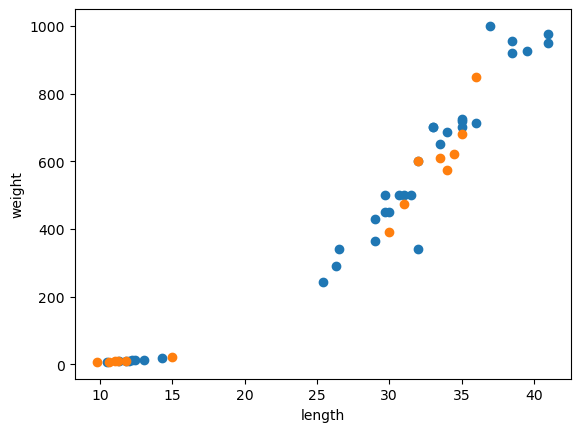

In [22]:
# 산점도 그래프로 확인
import matplotlib.pyplot as plt
plt.scatter(train_input[:, 0], train_input[:, 1])  # 훈련 세트의 길이와 무게를 산점도로 표현
plt.scatter(test_input[:, 0], test_input[:, 1])  # 테스트 세트의 길이와 무게를 산점도로 표현
plt.xlabel('length')  # x축 레이블
plt.ylabel('weight')  # y축 레이블
plt.show()  # 그래프 출력

### 두 번째 머신러닝 프로그램

- 만든 훈련 세트와 테스트 세트로 k-최근접 이웃 모델을 훈련

- fit() 메서드를 실행할 때마다 KNeighborsClassifier 클래스의 객체는 이전에 학습한 모든 것을 잃어비림

- 이전 모델을 그대로 두고 싶다면 KNeighborsClassifier 클래스 객체를 새로 만들어야 함

In [23]:
# 이전에 만든 kn 객체 그대로 사용
kn.fit(train_input, train_target)

KNeighborsClassifier()

In [24]:
# test_input과 test_target으로 모델 평가
kn.score(test_input, test_target)

1.0

In [25]:
# 테스트 세트의 예측 값과 실제 타깃값 출력
kn.predict(test_input)

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [26]:
test_target

array([0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

- predict() 메서드의 출력 결과가 test_target의 출력과 동일하게 array()로 감싸져 있음

- 이 값은 넘파이 배열을 의미
- predict() 메서드가 반환하는 값은 단순한 파이썬 리스트가 아니라 넘파이 배열임